In [2]:
import pandas as pd 
import numpy as np 
import seaborn as snb
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_excel('C:\\Users\\Bar Gloria\\Downloads\\Ataque cardiaco.xlsx')
df1

,Age,Genero,Fumador,Consume Alcohol,Nivel de actividad Fisica,IMC,Diabetes,HIpertension,Nivel de colesterol,Resting_BP,Heart_Rate,Historia Familiar,Nivel de stres,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


In [5]:
##lIMPIEZA DE LOS DATOS : verificar si hay nulos, tambien se puede usar la funcion isna()
df1.isnull().sum()

Age                          0
Genero                       0
Fumador                      0
Consume Alcohol              0
Nivel de actividad Fisica    0
IMC                          0
Diabetes                     0
HIpertension                 0
Nivel de colesterol          0
Resting_BP                   0
Heart_Rate                   0
Historia Familiar            0
Nivel de stres               0
Chest_Pain_Type              0
Thalassemia                  0
Fasting_Blood_Sugar          0
ECG_Results                  0
Exercise_Induced_Angina      0
Max_Heart_Rate_Achieved      0
Heart_Attack_Risk            0
dtype: int64

In [23]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [24]:
## tranformacion de dato mediante asignacion o funcion
referencia_IMC= {
    '18': 'Bajo Peso',
    '24': 'Normal',
    '29': 'Sobrepeso',
    '30': 'Obesidad',
}

df1['IMC'].dtype

dtype('float64')

In [8]:
## la primer función se uso para redondear los valores de la columna y la segunda funcion se uso para pasar a entero los valores de la columna IMC. 
df1['IMC'].round()
df1['IMC']=df1['IMC'].astype(float)
df1['IMC']

0        34.61
1        22.75
2        35.32
3        18.23
4        19.82
         ...  
49995    39.93
49996    18.10
49997    21.42
49998    29.93
49999    30.85
Name: IMC, Length: 50000, dtype: float64

In [9]:
##Esta funcion nos permite clasificar los valores del imc. 

df1['Diagnóstico']=pd.cut(df1['IMC'],bins=[0,18.0,25.0,30.0,float('inf')],labels=['Bajo Peso','Normal','Sobrepeso','Obesidad'])

In [10]:
df1['Diagnóstico']

0         Obesidad
1           Normal
2         Obesidad
3           Normal
4           Normal
           ...    
49995     Obesidad
49996       Normal
49997       Normal
49998    Sobrepeso
49999     Obesidad
Name: Diagnóstico, Length: 50000, dtype: category
Categories (4, object): ['Bajo Peso' < 'Normal' < 'Sobrepeso' < 'Obesidad']

In [28]:
edad_promedio=df1['Age'].mean()
edad_promedio

np.float64(53.3987)

In [29]:
##Estadistica descriptiva 
df1.describe()

,Age,Fumador,Consume Alcohol,IMC,Diabetes,HIpertension,Nivel de colesterol,Resting_BP,Heart_Rate,Historia Familiar,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [ ]:
##Que porcentaje de la poblacion tiene riesgo alto de contraer un infarto?

In [4]:
frecuencia=df1['Heart_Attack_Risk'].value_counts().reset_index()
frecuencia.columns = ['Riesgo', 'Frecuencia_absoluta']
total=frecuencia['Frecuencia_absoluta'].sum()
frecuencia['Frecuencia_relativa']=frecuencia['Frecuencia_absoluta']/total
frecuencia['Porcentaje'] = (frecuencia['Frecuencia_relativa'] * 100).round(2)
frecuencia


,Riesgo,Frecuencia_absoluta,Frecuencia_relativa,Porcentaje
0,Low,25024,0.50048,50.05
1,Moderate,14904,0.29808,29.81
2,High,10072,0.20144,20.14


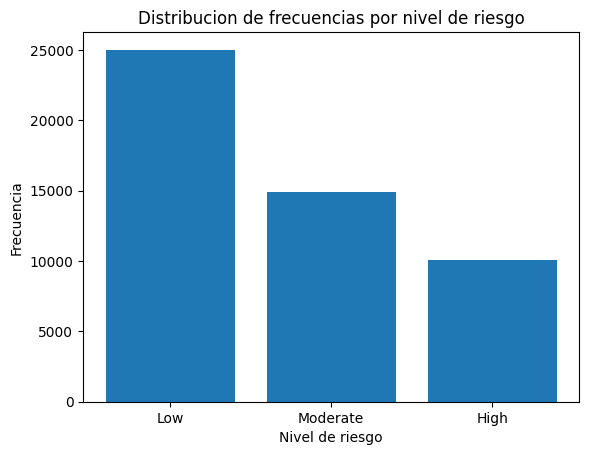

In [28]:

plt.bar(frecuencia['Riesgo'],frecuencia['Frecuencia_absoluta'])
plt.xlabel('Nivel de riesgo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de frecuencias por nivel de riesgo')
plt.show()
## En el gráfico, se puede observar el nivel de riesgo de la población en general en estudio es baja.  Solo un 20% de la población tiene riesgo alto. 

In [31]:
frecuenciaa=df1['Diagnóstico'].value_counts().reset_index()
frecuenciaa.columns = ['Diagnóstico', 'Frecuencia_absoluta']
total=frecuenciaa['Frecuencia_absoluta'].sum()
frecuenciaa['Frecuencia_relativa']=frecuenciaa['Frecuencia_absoluta']/total
frecuenciaa['Porcentaje'] = (frecuenciaa['Frecuencia_relativa'] * 100).round(2)
frecuenciaa

## A partir de la tabla de frecuencias se puede observar que el 39,9% de la población, en estudio, presenta Obesidad. 

,Diagnóstico,Frecuencia_absoluta,Frecuencia_relativa,Porcentaje
0,Obesidad,19949,0.39898,39.90
1,Normal,13930,0.27860,27.86
2,Sobrepeso,10089,0.20178,20.18
3,Bajo Peso,6032,0.12064,12.06


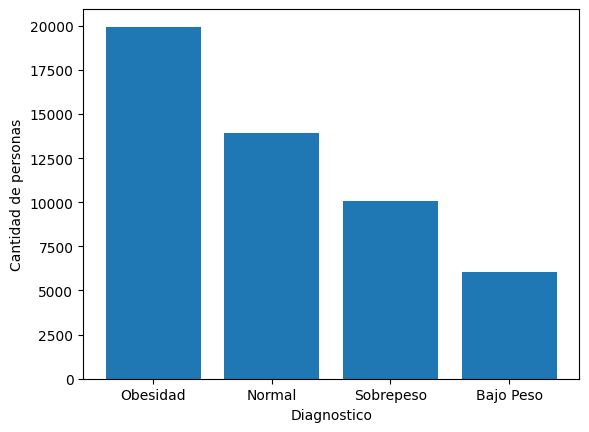

In [37]:
plt.bar(frecuenciaa['Diagnóstico'],frecuenciaa['Frecuencia_absoluta'])
plt.xlabel('Diagnostico')
plt.ylabel('Cantidad de personas')

plt.show()
## El 39,9% esta representado por aproximadamente 20mil personas.

<function matplotlib.pyplot.show(close=None, block=None)>

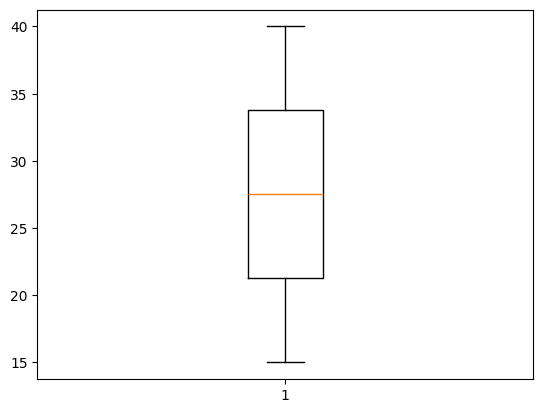

In [38]:
plt.boxplot(df1['IMC'])
plt.show
## En el boxplot se puede observar que la mediana se encuentra entre el IMC 25 Y 30, el cual indica sobrepeso.

In [ ]:
##Hipotesis: La presencia de diabetes es el principal factor causante de riesgo cardiaco en relacion a los demas. 
##coeficiente de relacion de chi cuadrados 
##HO: Las mujeres mayores a 50 años tienen la misma probabilidad que los hombres de igual edad, de contraer un ataque cardiaco
##HI:Las mujeres mayores a 50 años tienen menos probabilidad que los hombres de igual edad, de contraer un ataque cardiaco 

In [19]:
from scipy.stats import chi2_contingency 
from scipy.stats import chi2

In [9]:
condiciones=[(df1['Genero']=='Female') & (df1['Age'] >=50), (df1['Genero']=='Male') & (df1['Age'] >=50)]

valores = ['Female ≥50', 'Male ≥50']
df1['grupo'] = np.select(condiciones, valores, default='Otros')


df_filtrado = df1[df1['grupo'].isin(['Female ≥50', 'Male ≥50'])]

tabla=pd.crosstab(df_filtrado['grupo'], df1['Heart_Attack_Risk'],margins=True)
tabla


Heart_Attack_Risk,High,Low,Moderate,All
grupo,,,,
Female ≥50,2814,6895,4151,13860
Male ≥50,2756,6907,4063,13726
All,5570,13802,8214,27586


In [10]:
chi2_valor,pval,dof,exp=chi2_contingency(tabla)
print(f"Chi-cuadrado: {chi2_valor}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {pval}")
print("Tabla de frecuencias esperadas:")
print(exp)

Chi-cuadrado: 0.9062751220326737
Grados de libertad: 6
Valor p: 0.9889170145263517
Tabla de frecuencias esperadas:
[[ 2798.52823896  6934.52185891  4126.94990212 13860.        ]
 [ 2771.47176104  6867.47814109  4087.05009788 13726.        ]
 [ 5570.         13802.          8214.         27586.        ]]


In [13]:
significancia =0.05
p=1-significancia
valor_critico=chi2.ppf(p,dof)



In [14]:
if chi2_valor> valor_critico: 
    print ('Se rechaza la hipótesis nula:  Las mujeres mayores a 50 años tienen menos probabilidad que los hombres de igual edad, de contraer un ataque cardiaco')
else: 
   print("No se rechaza la hipótesis nula:  Las mujeres mayores a 50 años tienen la misma probabilidad que los hombres de igual edad, de contraer un ataque cardiaco")

No se rechaza la hipótesis nula:  Las mujeres mayores a 50 años tienen la misma probabilidad que los hombres de igual edad, de contraer un ataque cardiaco


In [17]:
##HO:"El bajo nivel de actividad física, aumenta el riesgo cardíaco".
##HI: "El nivel de actividad física no está relacionado con el riesgo cardíaco."
h2=pd.crosstab(df1['Nivel de actividad Fisica'], df1['Heart_Attack_Risk'],margins=True)
h2

Heart_Attack_Risk,High,Low,Moderate,All
Nivel de actividad Fisica,,,,
High,2000,4944,3001,9945
Low,4069,10025,5967,20061
Moderate,4003,10055,5936,19994
All,10072,25024,14904,50000


In [18]:
## la logica de la tabla de frecuencias seria multiplicar total de la primer fila y columna dividido el total de la muestra (ej 10072*9945/50000)
chi2_s,pval,dof,exp=chi2_contingency(h2)
print(f"Chi-cuadrado: {chi2_s}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {pval}")
print("Tabla de frecuencias esperadas:")
print(exp)

Chi-cuadrado: 1.4020138256660755
Grados de libertad: 9
Valor p: 0.997810501625266
Tabla de frecuencias esperadas:
[[ 2003.3208   4977.2736   2964.4056   9945.     ]
 [ 4041.08784 10040.12928  5979.78288 20061.     ]
 [ 4027.59136 10006.59712  5959.81152 19994.     ]
 [10072.      25024.      14904.      50000.     ]]


In [20]:
significancia =0.05
p=1-significancia
valor_critico=chi2.ppf(p,dof)

In [21]:
if chi2_s> valor_critico: 
    print ('Se rechaza la hipótesis nula: El nivel de actividad física no está relacionado con el riesgo cardíaco')
else: 
   print("No se rechaza la hipótesis nula: El bajo nivel de actividad física, aumenta el riesgo cardíaco")

No se rechaza la hipótesis nula: El bajo nivel de actividad física, aumenta el riesgo cardíaco


In [29]:
##COEFICIENTE DE CORRELACIÓN DE PEARSON 
## QUE RELACIÓN EXISTE ENTRE LA EDAD Y FRECUENCIA CARDIACA 
df1[['Age','Heart_Rate']].corr(method='pearson')

,Age,Heart_Rate
Age,1.000000,-0.004448
Heart_Rate,-0.004448,1.000000


In [31]:
##RTA: El nivel de relacion entre las variables es casi nulo, es decir no hay correlación lineal. 


In [13]:
## Aca se generó una nueva columna para reeplazar los valores originales por NO y SI
df1['Diabetico']=df1['Diabetes'].map({0: 'NO', 1: 'SI'})

In [22]:
##HO: Las personas con obesidad son más propensas a desarrollar diabetes.  
##HI:  No hay relación entre la obesidad y el desarrollo de diabetes 
h3=pd.crosstab (df1['Diabetico'],df1['Diagnóstico'],margins=True)
h3

Diagnóstico,Bajo Peso,Normal,Sobrepeso,Obesidad,All
Diabetico,,,,,
NO,4838,11178,8059,15983,40058
SI,1194,2752,2030,3966,9942
All,6032,13930,10089,19949,50000


In [20]:
chi2_s,pval,dof,exp=chi2_contingency(h3)
print(f"Chi-cuadrado: {chi2_s}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {pval}")
print("Tabla de frecuencias esperadas:")
print(exp)

Chi-cuadrado: 0.5294587435934962
Grados de libertad: 8
Valor p: 0.9998342578888079
Tabla de frecuencias esperadas:
[[ 4832.59712 11160.1588   8082.90324 15982.34084 40058.     ]
 [ 1199.40288  2769.8412   2006.09676  3966.65916  9942.     ]
 [ 6032.      13930.      10089.      19949.      50000.     ]]


In [21]:
significancia =0.05
p=1-significancia
valor_critico=chi2.ppf(p,dof)

In [23]:
if chi2_s> valor_critico: 
    print ('Se rechaza la hipótesis nula:  No hay relación entre la obesidad y el desarrollo de diabetes')
else: 
   print("No se rechaza la hipótesis nula: Las personas con obesidad son más propensas a desarrollar diabetes")

No se rechaza la hipótesis nula: Las personas con obesidad son más propensas a desarrollar diabetes
